In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,20)

import cv2
import albumentations as A
import matplotlib.pyplot as plt
import random
from pytorch_toolbelt.utils import fs
from retinopathy.augmentations import CropBlackRegions
from retinopathy.augmentations import MakeTooBlurryGauss, MakeTooBlurryMedian
    

images = [
    '0a2b5e1a0be8.png',
    '0a262e8b2a5a.png',
    '0b121d798018.png',
    '0ca261d6e31d.png',
    '0d2c1ae24459.png',
    '0e9d6c70eaf7.png',
    '0e052b0dec40.png',
    '0fa8a299f431.png',
    '1ca7ecbd29fc.png',
    '2cb697cbcb0b.png',
    '2f346c794823.png',
    '2f906addeb38.png',
    '4ca4c2b18a48.png',
    '04e1b77ef107.png',
    '6d7f586a4f82.png',
    '6d41b03ce069.png',
    '10c9d368f264.png',
    '25d98da73248.png',
    '31d79157e7c4.png'
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def augment_and_show(image, augmentation, seed=42):
    random.seed(seed)
    
    if isinstance(image, str):
        image = fs.read_rgb_image(image)
    images = [image]
    for i in range(9):
        img = augmentation(image=image)['image']
        images.append(img)
    
    rows = 5
    plt.figure(figsize=(20,40))
    f,ax = plt.subplots(rows, len(images) // rows)
    for i in range(len(images)):
        ax[i % rows, i // rows].imshow(images[i])
        ax[i % rows, i // rows].axis('off')
    f.tight_layout()
    f.show()

def augment_and_show_many(images, augmentation, seed=42):
    random.seed(seed)
    
    rows = len(images)
    for i in range(len(images)):
        image = images[i]        
        if isinstance(image, str):
            image = fs.read_rgb_image(image)

        img_aug = augmentation(image=image)['image']

        plt.figure(figsize=(20, 10))
        f,ax = plt.subplots(1, 2)

        ax[0].imshow(image)
        ax[0].axis('off')

        ax[1].imshow(img_aug)
        ax[1].axis('off')

        f.tight_layout()
        f.show()

C:\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1440x720 with 0 Axes>

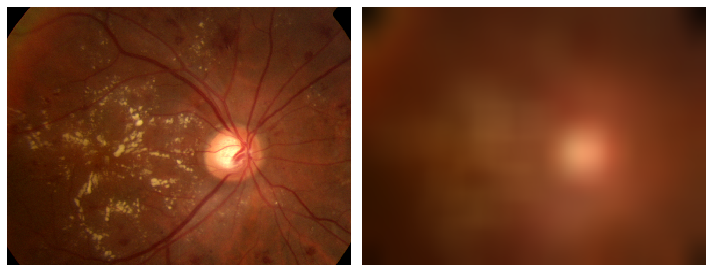

<Figure size 1440x720 with 0 Axes>

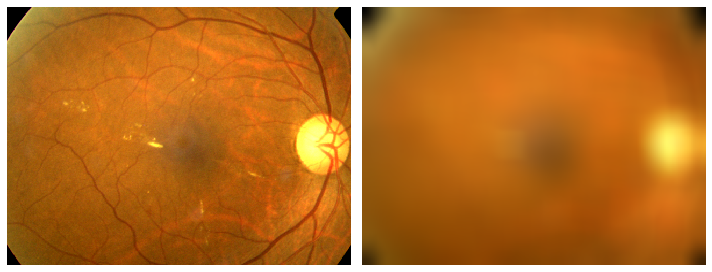

<Figure size 1440x720 with 0 Axes>

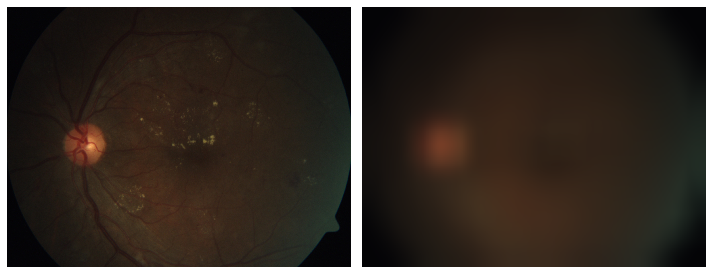

<Figure size 1440x720 with 0 Axes>

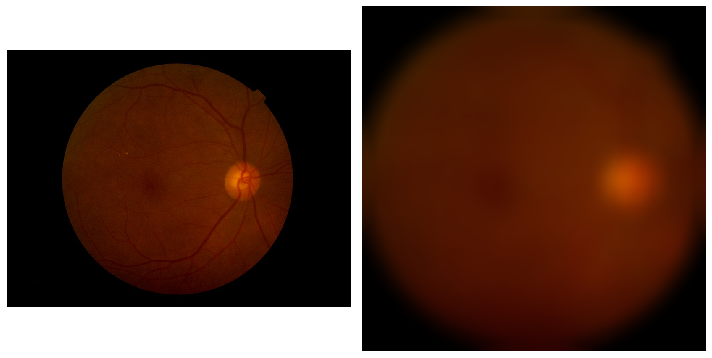

<Figure size 1440x720 with 0 Axes>

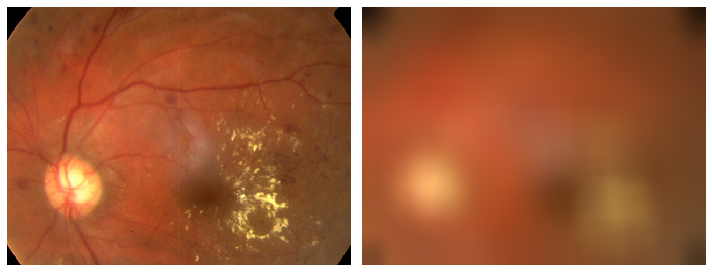

<Figure size 1440x720 with 0 Axes>

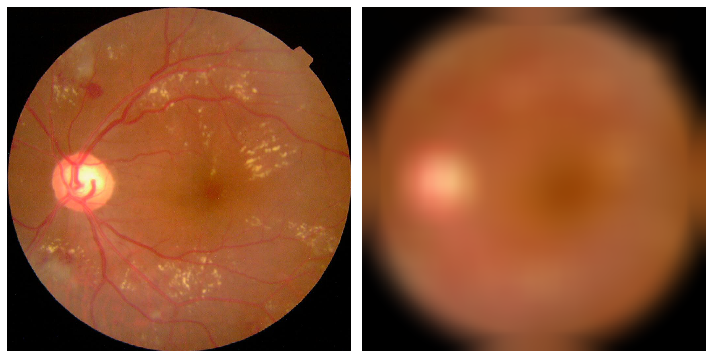

<Figure size 1440x720 with 0 Axes>

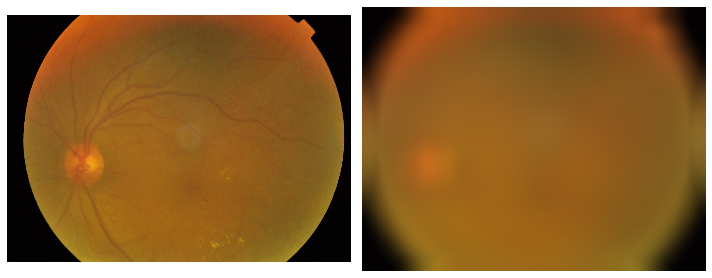

<Figure size 1440x720 with 0 Axes>

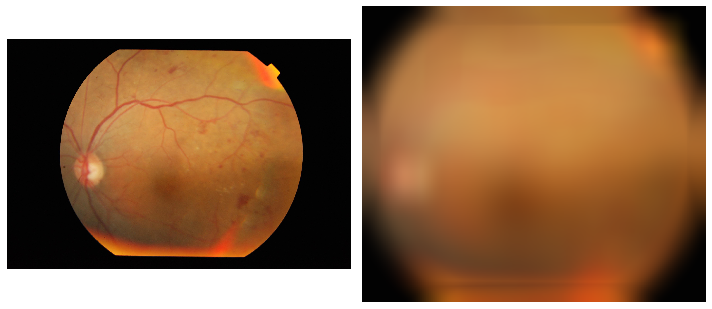

<Figure size 1440x720 with 0 Axes>

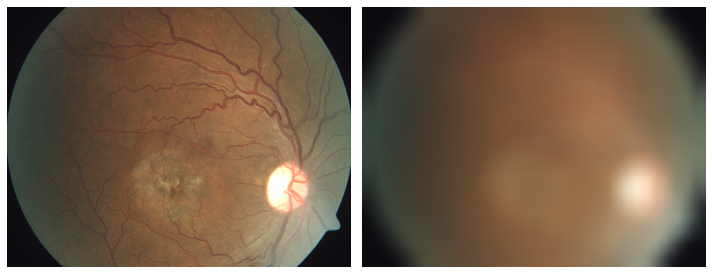

<Figure size 1440x720 with 0 Axes>

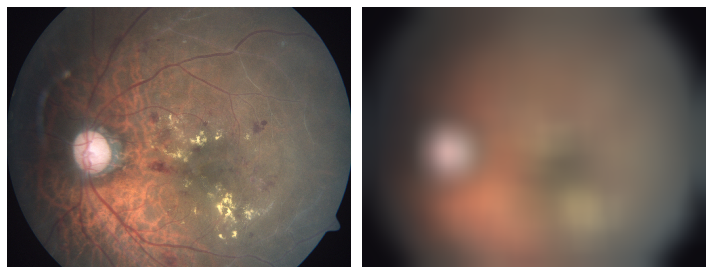

<Figure size 1440x720 with 0 Axes>

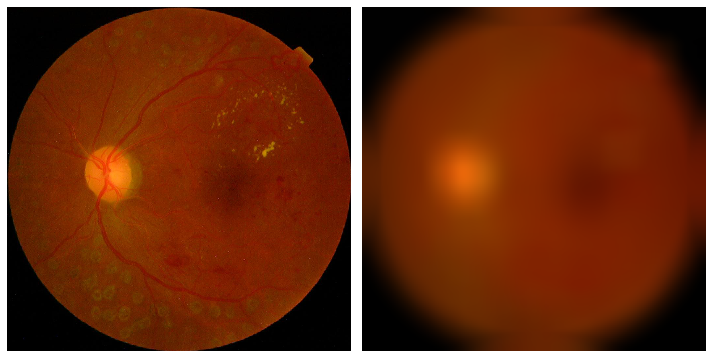

<Figure size 1440x720 with 0 Axes>

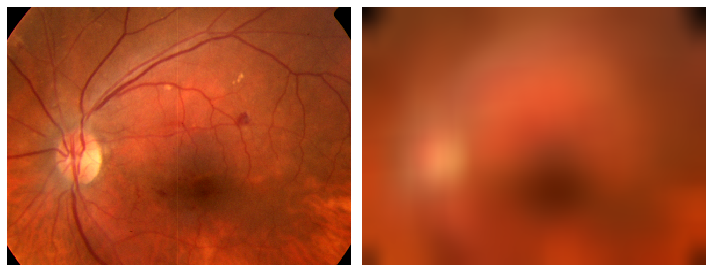

<Figure size 1440x720 with 0 Axes>

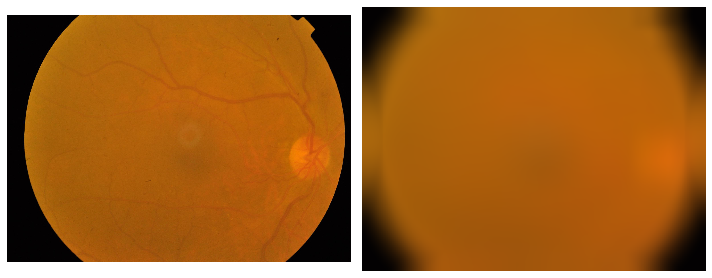

<Figure size 1440x720 with 0 Axes>

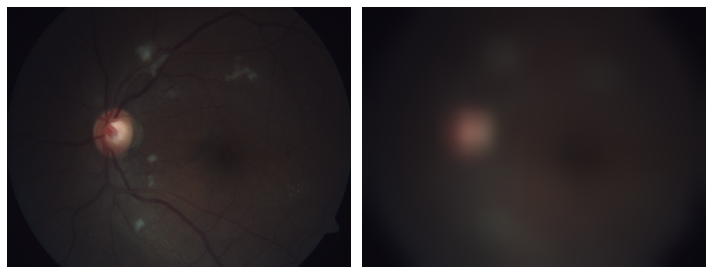

<Figure size 1440x720 with 0 Axes>

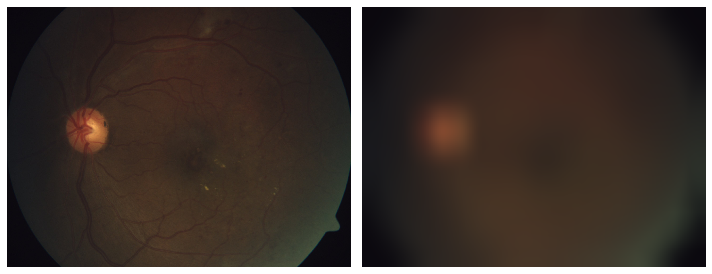

<Figure size 1440x720 with 0 Axes>

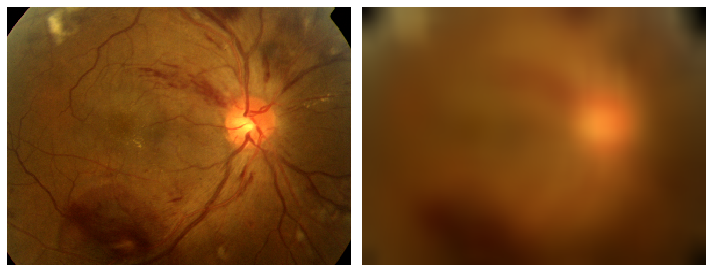

<Figure size 1440x720 with 0 Axes>

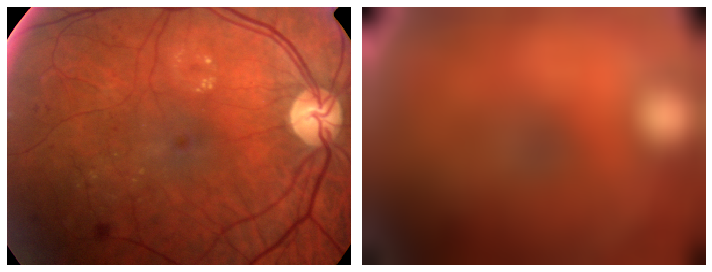

<Figure size 1440x720 with 0 Axes>

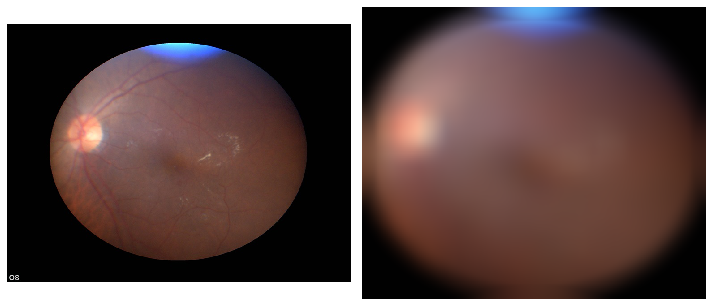

<Figure size 1440x720 with 0 Axes>

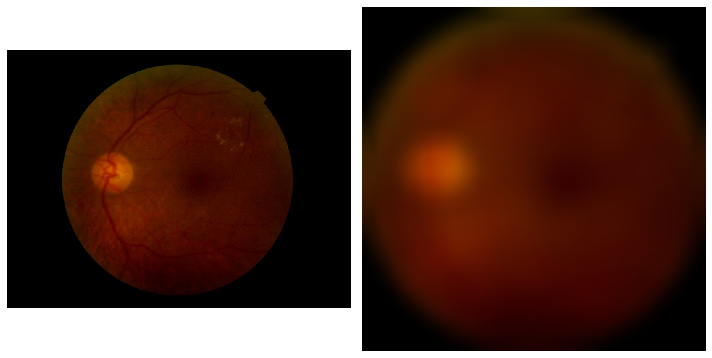

In [26]:
image = cv2.imread(images[0])
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

class BrightnessContrastDestroy(A.ImageOnlyTransform):
    def __init__(self, p=0.5):
        super().__init__(p=p)

    @property
    def targets(self):
        return {'image': self.apply, 'diagnosis': self.apply_to_diagnosis}

    def apply_to_diagnosis(self, diagnosis, **params):
        return 0

    def apply(self, img, alpha=1, beta=0, **params):
        from albumentations.augmentations.functional import brightness_contrast_adjust
        img = brightness_contrast_adjust(img, alpha=alpha, beta=beta)
        return img

    def get_params(self):
        return {
            # 'alpha': random.uniform(0.05, 0.25),
            # 'beta': 0
            'alpha': 1,
            'beta': random.uniform(-1, -3)
        }



t = A.Compose([
    CropBlackRegions(),
    A.LongestMaxSize(512),
    # 
    # RedFree(p=1),
    # BrightnessContrastDestroy(p=1),
    MakeTooBlurryGauss(p=1),
    # MakeTooBlurryMedian(p=1)
    # A.CLAHE(p=1),
    # UnsharpMask(p=1)
])
augment_and_show_many(images, t)

In [8]:
# def removeFisheyeLensDist(distorted, K, D, DIM=None):
#     if DIM is None:
#         DIM = distorted.shape[1], distorted.shape[0]
#         
#     map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
#     undistorted_img = cv2.remap(distorted, map1, map2, 
#                                 interpolation=cv2.INTER_LINEAR, 
#                                 borderMode=cv2.BORDER_CONSTANT)
#     
#     # undistorted = cv2.fisheye.undistortImage(distorted, K, D)
#     return undistorted_img
# 
# 
# # plt.figure()
# # plt.imshow(image_t)
# # plt.show()
# 
# K = np.array([[500,0,256],
#               [0,500,256],
#               [0,0,1]],dtype=np.float32)
# # D = np.array([-2.57614020e-01, 8.77086999e-02, -2.56970803e-04, -5.93390389e-04])
# D = np.array([[0],[0],[0],[0]],dtype=np.float32)
# 
# und = removeFisheyeLensDist(image_t, K,D)
# 
# plt.figure()
# plt.imshow(und)
# plt.show()

In [16]:
# augment_and_show(images[0], FancyPCA(alpha_std=6, p=1))

In [65]:
# augment_and_show(images[0], ChannelIndependentCLAHE(p=1))

In [66]:
# augment_and_show(images[0], UnsharpMask(p=1))


In [67]:
aug = A.Compose([
    A.LongestMaxSize(512),
    A.ElasticTransform(alpha_affine=0,
                       alpha=35,
                       sigma=5,
                       border_mode=cv2.BORDER_CONSTANT,
                       value=0,
                       p=1)
    ])

# augment_and_show(images[0], aug)

In [9]:
# ISO Noise
aug = A.Compose([
    CropBlackRegions(),
    A.LongestMaxSize(512),
    A.ISONoise(color_shift=(0.01,0.03), intensity=(0.05, 0.1) p=1)
    # A.GridDistortion(border_mode=cv2.BORDER_CONSTANT,
    #                  value=0,
    #                  p=1)
    ])

augment_and_show(images[0], aug)



SyntaxError: invalid syntax (<ipython-input-9-8e22b7ef7edb>, line 6)

C:\Anaconda3\envs\pytorch11\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1440x2880 with 0 Axes>

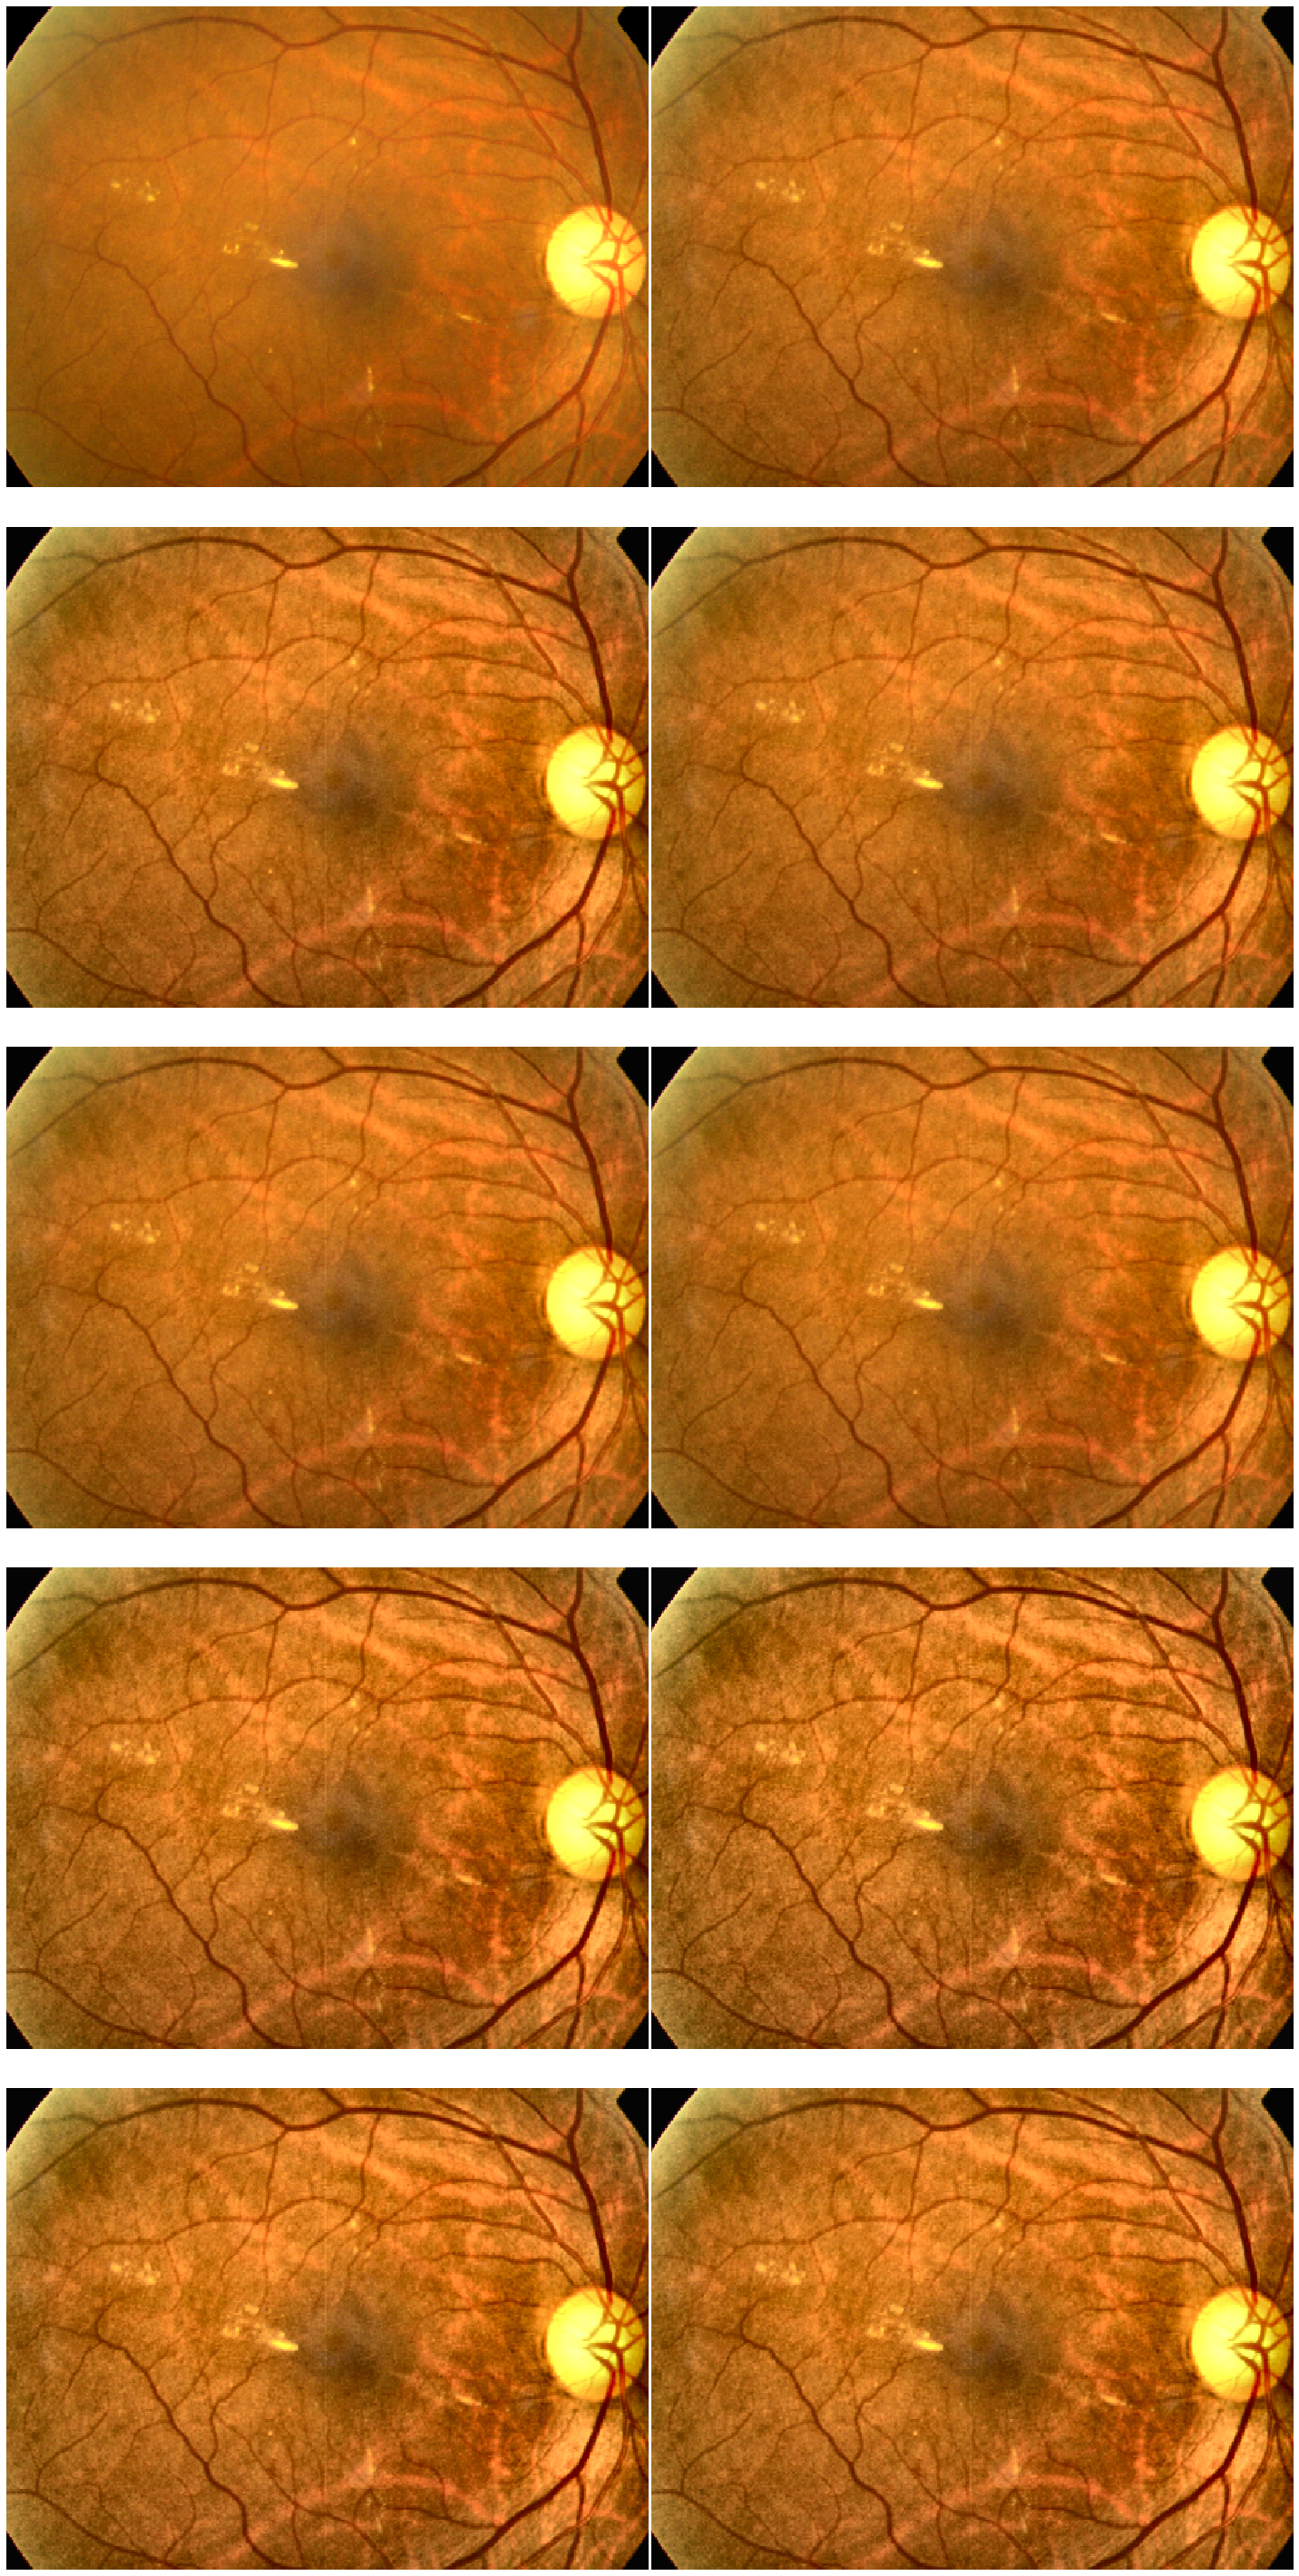

In [74]:
# A.RandomBrightnessContrast(),
# IndependentRandomBrightnessContrast(),
# A.RandomGamma(),
# A.CLAHE(),
# 
# A.

aug = A.Compose([
    A.LongestMaxSize(512),
    # A.RGBShift(r_shift_limit=40, b_shift_limit=30, g_shift_limit=30, p=1)
    # A.HueSaturationValue(hue_shift_limit=10,
    #                      sat_shift_limit=10, 
    #                      p=1),
    # A.RandomBrightnessContrast(brightness_limit=0.5, 
    #                            contrast_limit=0.4,
    #                            p=1)
    # IndependentRandomBrightnessContrast(brightness_limit=0.25, 
    #                            contrast_limit=0.24,
    #                            p=1),
    # A.RandomGamma(gamma_limit=(50,150),p=1),
    A.CLAHE(p=1)
    ])

augment_and_show(images[1], aug)
